## 1. Phase Modulation

Loading packages

In [10]:
%run pykat_notebook_defaults.py
pykat.init_pykat_plotting(dpi=90)

Imported matplotlib.pyplot as plt
Imported numpy as np


You can now use 'show_finesse(kat)' to display the Finesse code of a 'kat' object


### 1.1. Introduction
A laser field that is phase modulated by a cosinus can be described by $E(t) = \cos\big(\omega t +$<span style="color:Red"> $m\cos(\Omega t)$</span>$\big)$, i.e., it has an oscillating phase term. We can see an example of phase modulation below, where the figure is generated by using $\omega = 40\pi$ rad/s, $\Omega = 4\pi$ rad/s, and $m=5$. However, normally $\Omega<<\omega$, but I kept it only ten times smaller here in order to visualise it. Phase modulation preserves the amplitude of the carrier.

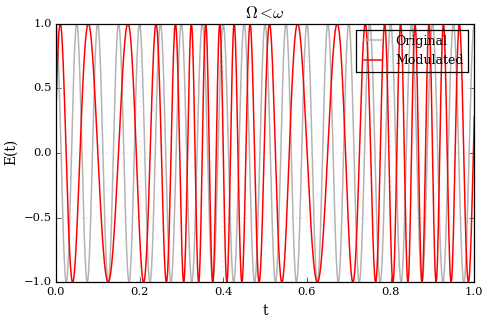

In [11]:
run phase_mod_figs.py

<font size="2"> **Figure.** The figure shows a phase modulated field $E(t) = \cos\big(\omega t +$<span style="color:Red"> $m\cos(\Omega t)$</span>$\big)$ with modulation freqeuncy $\Omega$ lower than the carrier frequency $\omega$. 

### 1.2. Theory: the sideband picture

More or less move here from the moving mirror part.

### 1.3 Finesse example

In [36]:
kat = finesse.kat()          # Initialising Finesse
kat.verbose = False          # Tells Finesse to talk less

code = """
## The optical system ##
l laser 1 0 n0                # Laser with 0 offset wavelength (thus default 1064nm used)
s s1 1 n0 n1                  # Space from laser to mirror (1 m)
mod eom 1k 0.3 2 pm 0 n1 n2  # Modulator (f=1 kHz, m=0.3, 2 sideband pairs, amplitude modulation, phase=20 degrees)
s s2 1000 n2 n3                  # Space from modulator to output (1 m)

## Detectors ##
#pd dc n3                # Photodiode and a low pass filter
#pd1 inphase 1k 0 n3     # Photodiode, mixer and low pass filter (demod f = 1kHz, demod phase = 0)
#pd1 quad 1k 90 n3       # Photodiode, mixer and low pass filter (demod f = 1kHz, demod phase = 90 degrees)
#pd1 max 1k max n3       # Photodiode, mixer and low pass filter (demod f = 1kHz, demod phase = optimised (max) )
ad sb 1k n3 
ad car 0 n3
## Instructions ##
#xaxis eom midx lin 0 1 200   # Varying the modulation index of the modulator between 0 and 1.
xaxis eom f log 1 1M 500 
put sb f $x1

yaxis abs:deg                # Allowing outputs to be complex numbers
"""

# Parsing the code and running the simulation
kat.parseCommands(code)
out = kat.run()

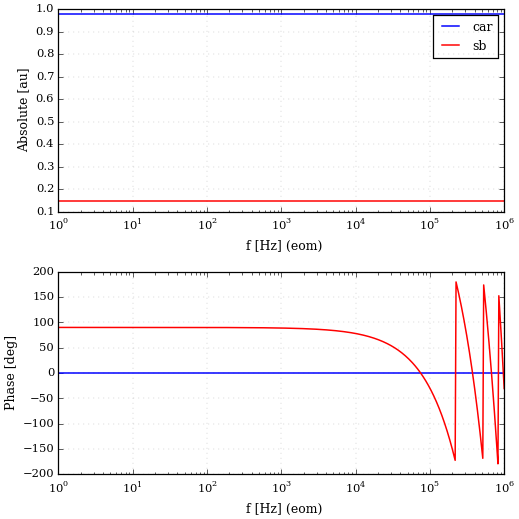

In [35]:
fig = out.plot()

### 1.4. Tasks